# Task 1 Machine Learning

In [1]:
import pandas as pd
df = pd.read_csv("X_train.csv")
y = pd.read_csv("y_train.csv")

In [2]:
df = df.iloc[:,1:]
df['y'] = y.y
df.head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x823,x824,x825,x826,x827,x828,x829,x830,x831,y
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202,75.0
1,NaN,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,NaN,107841.227180,2.472763,53.0
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,NaN,78.0
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935,65.0
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,NaN,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,NaN,1.930136,86.0
5,105225.715294,5338.257405,116079.992681,1101.463563,10137.027395,10.156352,103536.874451,1.032892e+06,NaN,2.417649,...,10.342421,979.810126,970.931200,101104.270606,106833.168262,5276.058413,9.507064,105832.645741,2.101954,72.0
6,97960.147371,5863.337683,100946.915512,1011.367297,9969.337040,10.482388,105394.645988,1.048708e+06,105021.705039,2.831909,...,NaN,985.231279,979.686333,104919.359073,104863.181903,10650.086997,10.002462,105295.359408,2.693517,51.0
7,97034.113314,3833.169655,88764.191776,972.515088,10668.781354,10.655846,101919.555571,1.012036e+06,NaN,2.603185,...,10.129546,939.390298,906.788943,101072.726336,106309.288797,7200.822173,10.664232,106181.400251,2.370094,83.0
8,109660.050530,3171.462183,86337.060618,973.133722,9631.882741,NaN,104468.823109,1.020110e+06,104791.490175,2.615647,...,10.598816,988.612580,888.335229,105793.617327,108749.074323,7833.603586,9.791602,108736.216681,2.507685,53.0
9,96483.286982,3710.106862,103418.684580,943.765532,10049.988440,10.601147,103213.962047,1.033319e+06,106074.467546,2.402711,...,10.280604,1084.598359,1142.286469,109472.976802,107673.817664,6533.079103,11.497484,106162.043291,2.114381,68.0


In [3]:
df.shape

(1212, 833)

### Checking for categorical data

In [4]:
df.nunique()

x0      1131
x1      1109
x2      1120
x3      1121
x4      1120
x5      1109
x6      1115
x7      1141
x8      1107
x9      1115
x10     1117
x11     1121
x12     1146
x13     1126
x14     1108
x15     1137
x16     1115
x17     1123
x18     1130
x19     1132
x20     1119
x21     1114
x22     1111
x23     1132
x24     1112
x25     1122
x26     1123
x27     1109
x28     1117
x29     1133
        ... 
x803    1111
x804    1126
x805    1117
x806    1106
x807    1121
x808    1132
x809    1124
x810    1119
x811    1122
x812    1118
x813    1103
x814    1131
x815    1137
x816    1125
x817    1112
x818    1114
x819    1136
x820    1132
x821    1121
x822    1122
x823    1125
x824    1115
x825    1121
x826    1121
x827    1129
x828    1134
x829    1114
x830    1128
x831    1120
y         57
Length: 833, dtype: int64

In [5]:
df.nunique().where(lambda x: x<1000).dropna()

x122    464.0
x169      1.0
x283      1.0
x367      1.0
x777      1.0
y        57.0
dtype: float64

Some columns are pure garbage, drop'em.

In [6]:
df = df.drop(columns=['x169','x283','x367','x777'])

In [7]:
df.shape

(1212, 829)

In [ ]:
df.describe()

### Checking for missing values

In [8]:
df.isna().sum()

x0       81
x1      103
x2       92
x3       91
x4       92
x5      103
x6       97
x7       71
x8      105
x9       97
x10      95
x11      91
x12      66
x13      86
x14     104
x15      74
x16      97
x17      89
x18      82
x19      80
x20      93
x21      98
x22     101
x23      80
x24     100
x25      90
x26      89
x27     103
x28      95
x29      79
       ... 
x803    101
x804     86
x805     95
x806    106
x807     91
x808     80
x809     88
x810     93
x811     90
x812     94
x813    109
x814     81
x815     75
x816     87
x817    100
x818     98
x819     76
x820     80
x821     91
x822     90
x823     87
x824     97
x825     91
x826     91
x827     83
x828     78
x829     98
x830     84
x831     92
y         0
Length: 829, dtype: int64

In [ ]:
%pip install fancyimpute

### Missing values were imputed with KNN = 3

In [9]:
from fancyimpute import KNN    
knnOutput = KNN(k=5).fit_transform(df)

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


Imputing row 1/1212 with 58 missing, elapsed time: 11.066
Imputing row 101/1212 with 58 missing, elapsed time: 11.173
Imputing row 201/1212 with 56 missing, elapsed time: 11.284
Imputing row 301/1212 with 74 missing, elapsed time: 11.392
Imputing row 401/1212 with 73 missing, elapsed time: 11.497
Imputing row 501/1212 with 51 missing, elapsed time: 11.609
Imputing row 601/1212 with 67 missing, elapsed time: 11.719
Imputing row 701/1212 with 79 missing, elapsed time: 11.826
Imputing row 801/1212 with 74 missing, elapsed time: 11.933
Imputing row 901/1212 with 57 missing, elapsed time: 12.042
Imputing row 1001/1212 with 61 missing, elapsed time: 12.158
Imputing row 1101/1212 with 58 missing, elapsed time: 12.275
Imputing row 1201/1212 with 61 missing, elapsed time: 12.398


In [10]:
df_new = pd.DataFrame(knnOutput, columns = df.columns)
df_new.head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x823,x824,x825,x826,x827,x828,x829,x830,x831,y
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202,75.0
1,100379.089451,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,10.254983,107841.227180,2.472763,53.0
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,2.205969,78.0
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935,65.0
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.315284,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,105017.959761,1.930136,86.0
5,105225.715294,5338.257405,116079.992681,1101.463563,10137.027395,10.156352,103536.874451,1.032892e+06,104854.942254,2.417649,...,10.342421,979.810126,970.931200,101104.270606,106833.168262,5276.058413,9.507064,105832.645741,2.101954,72.0
6,97960.147371,5863.337683,100946.915512,1011.367297,9969.337040,10.482388,105394.645988,1.048708e+06,105021.705039,2.831909,...,10.597671,985.231279,979.686333,104919.359073,104863.181903,10650.086997,10.002462,105295.359408,2.693517,51.0
7,97034.113314,3833.169655,88764.191776,972.515088,10668.781354,10.655846,101919.555571,1.012036e+06,106770.302473,2.603185,...,10.129546,939.390298,906.788943,101072.726336,106309.288797,7200.822173,10.664232,106181.400251,2.370094,83.0
8,109660.050530,3171.462183,86337.060618,973.133722,9631.882741,10.411735,104468.823109,1.020110e+06,104791.490175,2.615647,...,10.598816,988.612580,888.335229,105793.617327,108749.074323,7833.603586,9.791602,108736.216681,2.507685,53.0
9,96483.286982,3710.106862,103418.684580,943.765532,10049.988440,10.601147,103213.962047,1.033319e+06,106074.467546,2.402711,...,10.280604,1084.598359,1142.286469,109472.976802,107673.817664,6533.079103,11.497484,106162.043291,2.114381,68.0


### Variable importance with Random Forest

In [ ]:
%pip install matplotlib

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


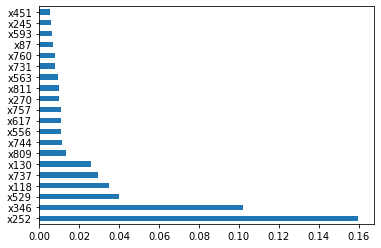

In [46]:
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline          

X = df_new.iloc[:, :df_new.shape[1]-1]
y = df_new.iloc[:,df_new.shape[1]-1]

model = RandomForestRegressor()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(20)
   .plot(kind='barh'))   

### Selecting top 11 variables (selecting 8 now)

In [47]:
ntop = 20
top = [x[1] for x in sorted(zip(model.feature_importances_, X.columns),reverse=True)][:ntop]
top

['x252',
 'x346',
 'x529',
 'x118',
 'x737',
 'x130',
 'x809',
 'x744',
 'x556',
 'x617',
 'x757',
 'x270',
 'x811',
 'x563',
 'x731',
 'x760',
 'x87',
 'x593',
 'x245',
 'x451']

In [48]:
df_fl = df_new.loc[:,top]
X = df_fl

### Random forest

In [49]:
model = RandomForestRegressor()
model.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [50]:
test = pd.read_csv("X_test.csv")
test.head(10)

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,0.0,116890.145646,4682.826460,102084.432558,988.163180,10412.331659,10.481227,103604.878991,1.095767e+06,100602.794631,...,11.027043,11.009213,1030.608247,1018.364228,108762.467652,105073.764746,7347.221554,8.598623,102506.589322,2.350805
1,1.0,104149.957877,3161.012055,93566.104799,1037.879907,11232.156777,10.143346,NaN,1.083111e+06,102331.038815,...,NaN,10.391822,1049.620654,972.516069,108773.164038,105822.141259,5687.349133,9.791258,107449.718830,2.278208
2,2.0,91332.402246,3922.735224,108810.999713,1008.536233,12030.362103,10.811671,107372.736023,1.075590e+06,104247.270565,...,10.648721,10.979466,973.772111,1068.819601,106851.090304,104651.998344,6510.915424,10.993281,107366.747806,2.171415
3,3.0,93281.714961,3707.283134,86947.473251,947.048927,10037.466655,10.208015,NaN,1.042872e+06,103283.424614,...,10.255209,10.566875,918.617516,NaN,104245.538474,102301.224747,NaN,9.845355,100865.094552,2.222927
4,4.0,88434.057156,5184.106152,85396.992336,1101.076469,10083.474388,10.124108,109507.125721,1.013667e+06,102676.240326,...,10.482693,10.784100,945.230640,1032.396697,106180.279333,104253.493703,6586.500123,11.953965,101665.694524,2.057716
5,5.0,91043.390585,4146.534885,91268.091403,1154.589193,9441.694185,10.717295,103842.545676,1.035499e+06,102035.018706,...,10.800191,10.103139,1035.457956,884.489581,109801.610644,101895.436428,7789.455660,10.807776,105731.457274,2.333160
6,6.0,99688.562896,3837.206580,NaN,1003.116899,10063.296302,10.432028,102069.293058,1.067081e+06,103123.934071,...,10.824475,10.799519,1182.809794,956.676196,100107.559207,NaN,6634.263699,9.813964,105695.013248,2.334734
7,7.0,86200.833899,3742.708690,82179.068135,1083.926045,10092.949754,NaN,NaN,1.077193e+06,103587.282340,...,10.085629,10.225581,835.522152,NaN,109760.965491,104998.433480,10041.628676,9.770844,103195.461169,2.350048
8,8.0,100451.803390,4635.422579,117426.714240,1102.941720,9416.639336,10.236655,107110.092874,1.050901e+06,107876.670635,...,10.334164,10.755348,1075.919820,1107.097405,108232.876372,101294.234955,6831.650979,9.613204,100793.680918,2.248109
9,9.0,105908.411694,4932.641944,99537.703882,1127.495728,11075.409634,NaN,104157.410169,1.024431e+06,101470.706537,...,10.208783,10.939357,900.716831,1204.190801,102340.771473,106013.191270,5804.629725,10.501201,109926.194819,2.350355


Data contains missing values, imputing values with KNN

In [51]:
test = test.iloc[:,1:]
knnOutput = KNN(k=5).fit_transform(test)
test_new = pd.DataFrame(knnOutput, columns = test.columns)
test_new.head(10)

/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


Imputing row 1/776 with 48 missing, elapsed time: 4.457
Imputing row 101/776 with 53 missing, elapsed time: 4.541
Imputing row 201/776 with 59 missing, elapsed time: 4.623
Imputing row 301/776 with 63 missing, elapsed time: 4.715
Imputing row 401/776 with 58 missing, elapsed time: 4.799
Imputing row 501/776 with 46 missing, elapsed time: 4.880
Imputing row 601/776 with 52 missing, elapsed time: 4.970
Imputing row 701/776 with 50 missing, elapsed time: 5.054


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,116890.145646,4682.826460,102084.432558,988.163180,10412.331659,10.481227,103604.878991,1.095767e+06,100602.794631,2.560690,...,11.027043,11.009213,1030.608247,1018.364228,108762.467652,105073.764746,7347.221554,8.598623,102506.589322,2.350805
1,104149.957877,3161.012055,93566.104799,1037.879907,11232.156777,10.143346,106063.617998,1.083111e+06,102331.038815,2.421424,...,10.481242,10.391822,1049.620654,972.516069,108773.164038,105822.141259,5687.349133,9.791258,107449.718830,2.278208
2,91332.402246,3922.735224,108810.999713,1008.536233,12030.362103,10.811671,107372.736023,1.075590e+06,104247.270565,2.534089,...,10.648721,10.979466,973.772111,1068.819601,106851.090304,104651.998344,6510.915424,10.993281,107366.747806,2.171415
3,93281.714961,3707.283134,86947.473251,947.048927,10037.466655,10.208015,103015.668566,1.042872e+06,103283.424614,2.374520,...,10.255209,10.566875,918.617516,951.492532,104245.538474,102301.224747,6864.962571,9.845355,100865.094552,2.222927
4,88434.057156,5184.106152,85396.992336,1101.076469,10083.474388,10.124108,109507.125721,1.013667e+06,102676.240326,2.375970,...,10.482693,10.784100,945.230640,1032.396697,106180.279333,104253.493703,6586.500123,11.953965,101665.694524,2.057716
5,91043.390585,4146.534885,91268.091403,1154.589193,9441.694185,10.717295,103842.545676,1.035499e+06,102035.018706,2.495993,...,10.800191,10.103139,1035.457956,884.489581,109801.610644,101895.436428,7789.455660,10.807776,105731.457274,2.333160
6,99688.562896,3837.206580,101711.365512,1003.116899,10063.296302,10.432028,102069.293058,1.067081e+06,103123.934071,2.462262,...,10.824475,10.799519,1182.809794,956.676196,100107.559207,103113.640009,6634.263699,9.813964,105695.013248,2.334734
7,86200.833899,3742.708690,82179.068135,1083.926045,10092.949754,10.567134,106087.236569,1.077193e+06,103587.282340,2.610939,...,10.085629,10.225581,835.522152,1005.181138,109760.965491,104998.433480,10041.628676,9.770844,103195.461169,2.350048
8,100451.803390,4635.422579,117426.714240,1102.941720,9416.639336,10.236655,107110.092874,1.050901e+06,107876.670635,2.375155,...,10.334164,10.755348,1075.919820,1107.097405,108232.876372,101294.234955,6831.650979,9.613204,100793.680918,2.248109
9,105908.411694,4932.641944,99537.703882,1127.495728,11075.409634,10.807573,104157.410169,1.024431e+06,101470.706537,2.639444,...,10.208783,10.939357,900.716831,1204.190801,102340.771473,106013.191270,5804.629725,10.501201,109926.194819,2.350355


In [54]:
test_fl = test_new.loc[:,top]
X = test_fl

In [55]:
test_y = model.predict(X)

In [56]:
output = pd.DataFrame({'id':[float(i) for i in range(0,len(X))],'y':test_y})
output.to_csv("rf_top20.csv",index=False)